<a href="https://colab.research.google.com/github/rghmf/Cursos-Azure/blob/main/6_estatistica_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
dados = pd.read_csv("Consumo_cerveja.csv", sep=";")

In [6]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [7]:
dados.shape

(365, 7)

In [11]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


In [12]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


In [13]:
x, y = (28, 11)

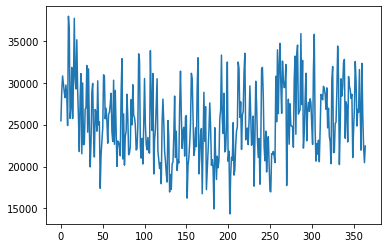

In [17]:
fig, ax = plt.subplots()
ax = dados['consumo'].plot()

In [18]:
import seaborn as sns

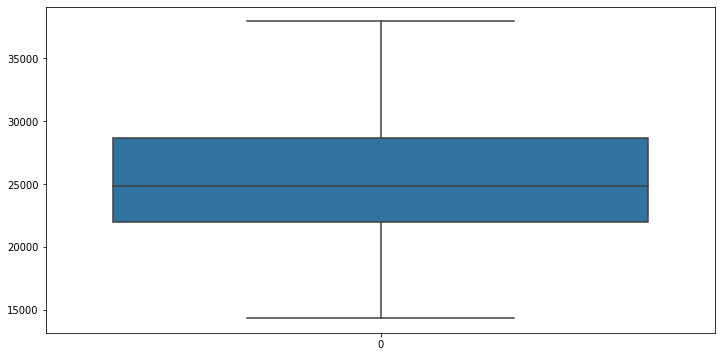

In [25]:
ax = sns.boxplot(data=dados['consumo'])
ax.figure.set_size_inches(12, 6)

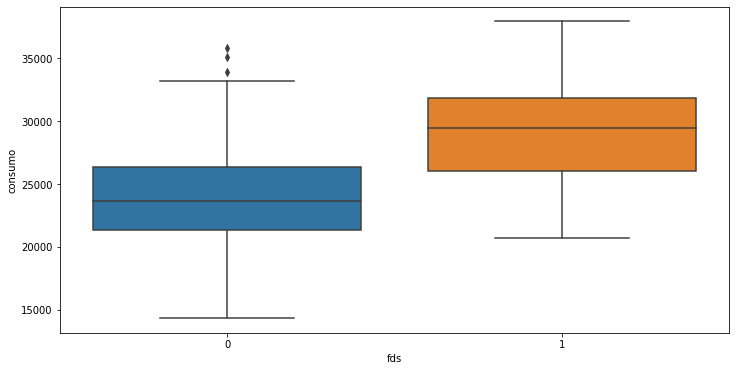

In [26]:
ax = sns.boxplot(y='consumo', x='fds', data=dados)
ax.figure.set_size_inches(12, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


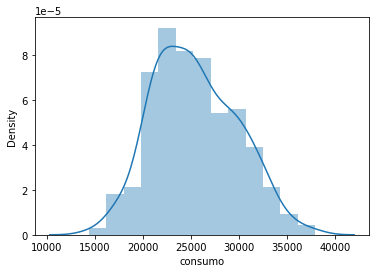

In [27]:
ax = sns.distplot(dados['consumo'])

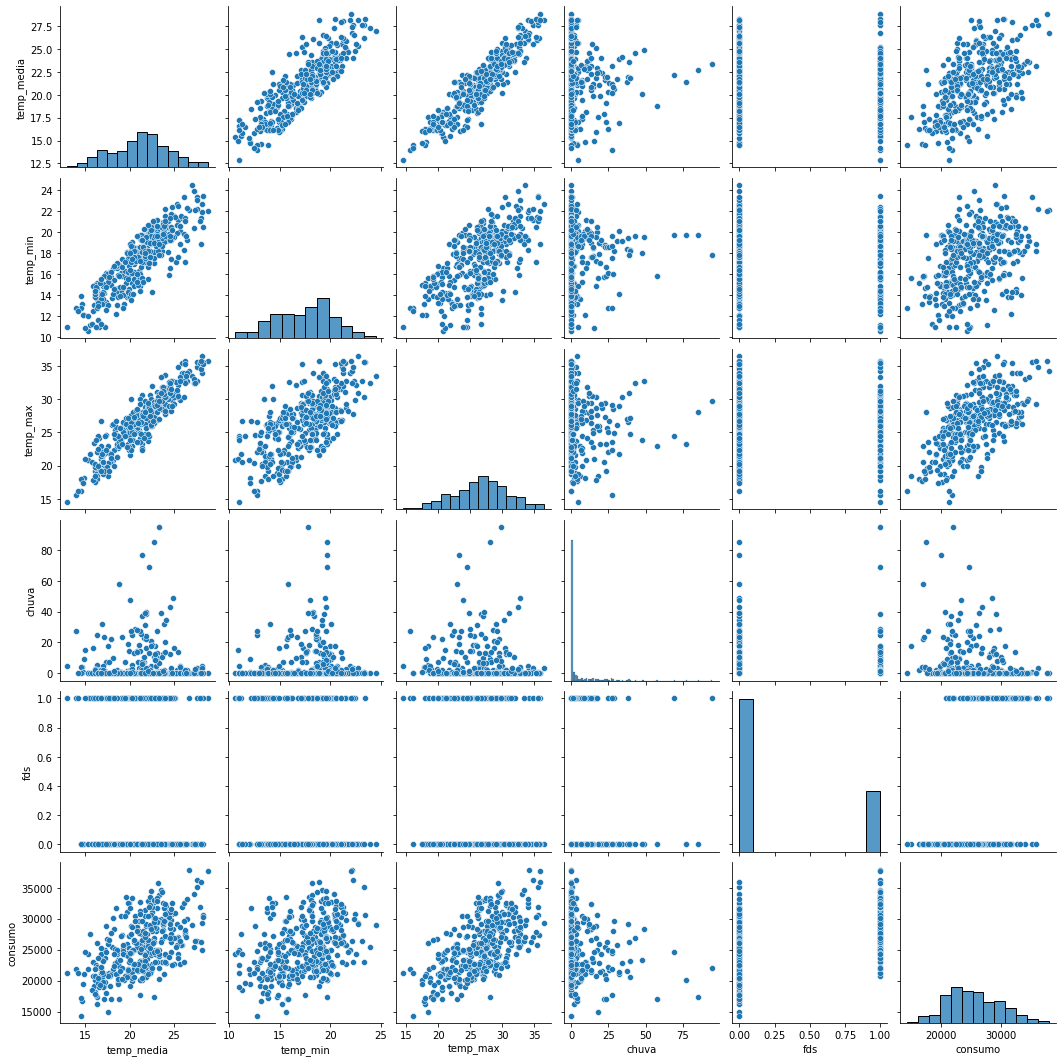

In [28]:
ax = sns.pairplot(dados)

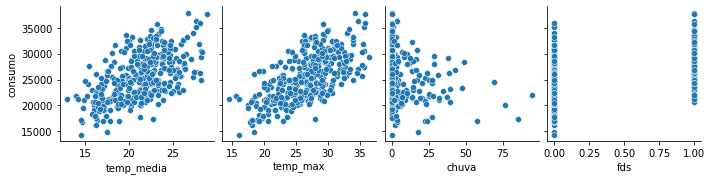

In [29]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media', 'temp_max', 'chuva', 'fds'])

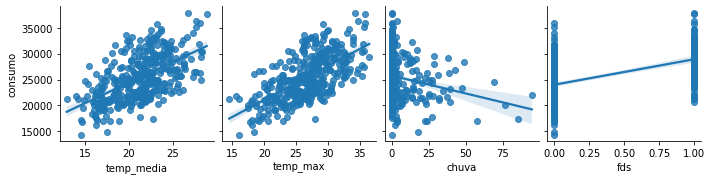

In [30]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')

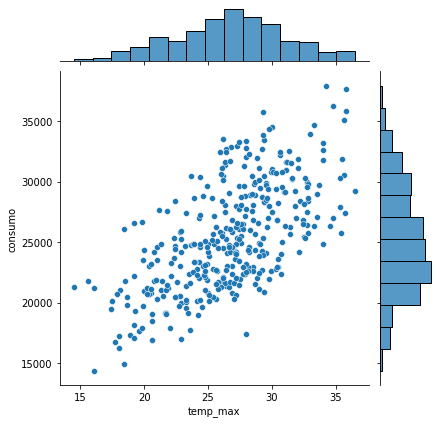

In [31]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados)

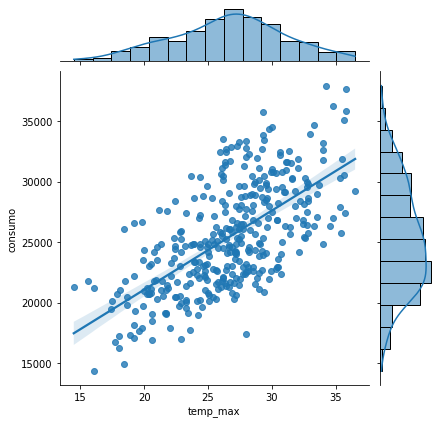

In [32]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y = dados['consumo']

In [35]:
X = dados[['temp_max', 'chuva', 'fds']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [39]:
X_train.shape

(255, 3)

In [42]:
X_test.shape

(110, 3)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn import metrics

In [45]:
modelo = LinearRegression()

In [47]:
modelo.fit(X_train, y_train)

LinearRegression()

In [48]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [50]:
y_previsto = modelo.predict(X_test)

In [51]:
entrada = X_test[0:1]

In [52]:
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [53]:
modelo.predict(entrada)[0]

26094.901775262017

In [55]:
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]
print('{0:.2f}litros '.format(modelo.predict(entrada)[0]))

26094.90litros 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [56]:
modelo.intercept_

5951.976339312445

In [57]:
type(modelo.intercept_)

numpy.float64

In [58]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [59]:
type(modelo.coef_)

numpy.ndarray

In [60]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [61]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

In [62]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetro'])

,Parâmetro
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


In [63]:
y_previsto_train = modelo.predict(X_train)

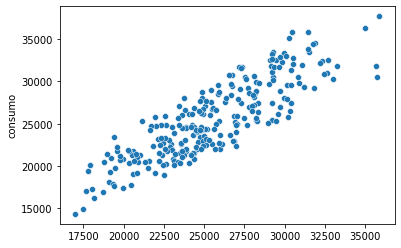

In [64]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)

In [65]:
residuo = y_train - y_previsto_train

In [66]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

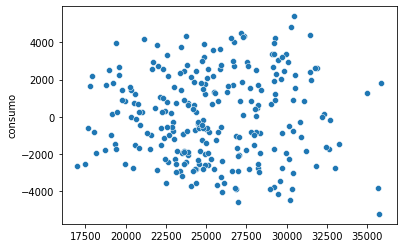

In [67]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


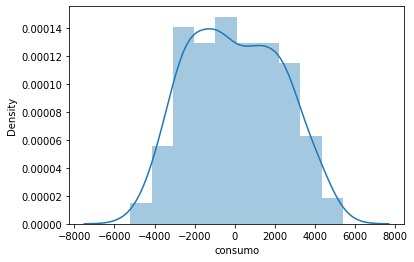

In [69]:
sns.distplot(residuo)

In [70]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [76]:
modelo_2 = LinearRegression()

In [77]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [80]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [81]:
#Calculando os R² mostra que o modelo com temp máx é melhor que a temp média

In [82]:
import pickle

In [84]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()